In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
sns.set()
from subprocess import check_output

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive
train=pd.read_csv('/gdrive/MyDrive/dataset_of_project_34/train.csv')
test=pd.read_csv('/gdrive/MyDrive/dataset_of_project_34/test.csv')
#df=pd.read_csv('https://www.kaggle.com/c/nyc-taxi-trip-duration/overview/')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [ ]:
# reading the tain and test csv files
#file1 = ('/content/train.csv')
#train = pd.read_csv(file1)

#file2 = ('/content/test.csv')
#test = pd.read_csv(file2)

##Exploratory Data Analysis

In [ ]:
train.head(2)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663


In [ ]:
test.head(2)

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625134 entries, 0 to 625133
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  625134 non-null  object 
 1   vendor_id           625134 non-null  int64  
 2   pickup_datetime     625134 non-null  object 
 3   passenger_count     625134 non-null  int64  
 4   pickup_longitude    625134 non-null  float64
 5   pickup_latitude     625134 non-null  float64
 6   dropoff_longitude   625134 non-null  float64
 7   dropoff_latitude    625134 non-null  float64
 8   store_and_fwd_flag  625134 non-null  object 
dtypes: float64(4), int64(2), object(3)
memory usage: 42.9+ MB


Here, we can observe that the train dataset has 11 columns and test dataset has 9 columns. 
In test dataset the missing columns are dropoff_datetime, and trip_duration.

####Categorizing the features/columns:


Dividing the features into categories:

Geographical: pickup_longitude , pickup_latitude , dropoff_longitude 

*   Geographical: pickup_longitude , pickup_latitude , dropoff_longitude, dropoff_latitude
*   Time related: pickup_datetime, dropoff_datetime
*   Identifier: id(not useful for analysis)
*  Others: vendor_id, passenger_count, store_and_fwd_flag
*   Target: trip_duration

In [ ]:
train.describe(include='all')

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
count,1458644,1.458644e+06,1458644,1458644,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1458644,1.458644e+06
unique,1458644,NaN,1380222,1380377,NaN,NaN,NaN,NaN,NaN,2,NaN
top,id2875421,NaN,2016-03-04 08:07:34,2016-02-19 19:25:04,NaN,NaN,NaN,NaN,NaN,N,NaN
freq,1,NaN,5,5,NaN,NaN,NaN,NaN,NaN,1450599,NaN
mean,NaN,1.534950e+00,NaN,NaN,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,NaN,9.594923e+02
std,NaN,4.987772e-01,NaN,NaN,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,NaN,5.237432e+03
min,NaN,1.000000e+00,NaN,NaN,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,NaN,1.000000e+00
25%,NaN,1.000000e+00,NaN,NaN,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,NaN,3.970000e+02
50%,NaN,2.000000e+00,NaN,NaN,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,NaN,6.620000e+02
75%,NaN,2.000000e+00,NaN,NaN,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,NaN,1.075000e+03


In [ ]:
#assigning the train and test data to df_tr and df_ts
df_tr = train
df_ts = test

In [ ]:
df_tr.duplicated()

0          False
1          False
2          False
3          False
4          False
           ...  
1458639    False
1458640    False
1458641    False
1458642    False
1458643    False
Length: 1458644, dtype: bool

In [ ]:
#lets check for duplicates in train dataset
len(df_tr[df_tr.duplicated()])

0

In [ ]:
#shape of train dataset
df_tr.shape

(1458644, 11)

In [ ]:
#shape of train dataset
df_ts.shape

(625134, 9)

In [ ]:
df_tr.nunique()

id                    1458644
vendor_id                   2
pickup_datetime       1380222
dropoff_datetime      1380377
passenger_count            10
pickup_longitude        23047
pickup_latitude         45245
dropoff_longitude       33821
dropoff_latitude        62519
store_and_fwd_flag          2
trip_duration            7417
dtype: int64

#### NaN or Missing Values

In [ ]:
df_tr.isna()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
1458639,False,False,False,False,False,False,False,False,False,False,False
1458640,False,False,False,False,False,False,False,False,False,False,False
1458641,False,False,False,False,False,False,False,False,False,False,False
1458642,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
#check for NaN values
df_tr.isna().sum()


id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [ ]:
df_tr.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [ ]:
df_ts.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
dtype: object

#### Note:We find there are no missing values from the non numeric columns as well.

In [ ]:
# Checking duplicates
df_tr.drop_duplicates(inplace=True)
df_tr.shape

(1458644, 11)

##### We observe that there are no duplicate values as well.

#### Dropping the unnecessary columns

In [ ]:
df_tr.drop('id',axis=1,inplace=True)

#### Renaming the Columns

In [ ]:
df_tr.rename(columns={'vendor_id':'vendor'}, inplace = True)
df_tr.rename(columns={'passenger_count':'n_people'}, inplace = True)
df_tr.rename(columns={'trip_duration':'duration'}, inplace = True)

In [ ]:
df_tr.rename(columns={'pickup_longitude':'pickup_long'}, inplace = True)
df_tr.rename(columns={'pickup_latitude':'pickup_lat'}, inplace = True)
df_tr.rename(columns={'dropoff_longitude':'dropoff_long'}, inplace = True)
df_tr.rename(columns={'dropoff_latitude':'dropoff_lat'}, inplace = True)

In [ ]:
df_tr.head(2)

,vendor,pickup_datetime,dropoff_datetime,n_people,pickup_long,pickup_lat,dropoff_long,dropoff_lat,store_and_fwd_flag,duration
0,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663


In [ ]:
df_tr.dtypes

vendor                  int64
pickup_datetime        object
dropoff_datetime       object
n_people                int64
pickup_long           float64
pickup_lat            float64
dropoff_long          float64
dropoff_lat           float64
store_and_fwd_flag     object
duration                int64
dtype: object

#### We can observe that the pickup_datetime and dropoff_datetime are object data types. We must convert them to datetime format. So that analysis of date and time will be easier for us.

####Converting object date to datetime

In [ ]:
#converting pickup_datetime and dropoff_datetime from object data type to datetime format
df_tr['pickup_datetime']=pd.to_datetime(df_tr['pickup_datetime'])
df_tr['dropoff_datetime']=pd.to_datetime(df_tr['dropoff_datetime'])
df_tr.dtypes
#you can now observe that the data types changed

vendor                         int64
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
n_people                       int64
pickup_long                  float64
pickup_lat                   float64
dropoff_long                 float64
dropoff_lat                  float64
store_and_fwd_flag            object
duration                       int64
dtype: object

In [ ]:
# Looking at the format of data to preprocess it
df_tr.pickup_datetime[0]

Timestamp('2016-03-14 17:24:55')

## Feature Extraction

###Day

In [ ]:
df_tr['day']=df_tr.pickup_datetime.dt.day
#df_tr['dropoff_day']=df_tr.dropoff_datetime.dt.day

###Month

In [ ]:
df_tr['month']=df_tr.pickup_datetime.dt.month

###Hour

In [ ]:
df_tr['hour']=df_tr.pickup_datetime.dt.hour

###Year

In [ ]:
#df_tr['year']=df_tr.pickup_datetime.dt.year

###Date

In [ ]:
df_tr['date']=df_tr.pickup_datetime.dt.date

In [ ]:
df_tr.head(2)

,vendor,pickup_datetime,dropoff_datetime,n_people,pickup_long,pickup_lat,dropoff_long,dropoff_lat,store_and_fwd_flag,duration,day,month,hour,date
0,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,14,3,17,2016-03-14
1,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,12,6,0,2016-06-12


###Day Name

In [ ]:
df_tr['day_name']=df_tr.pickup_datetime.dt.day_name()

In [ ]:
df_tr.head(2)

,vendor,pickup_datetime,dropoff_datetime,n_people,pickup_long,pickup_lat,dropoff_long,dropoff_lat,store_and_fwd_flag,duration,day,month,hour,date,day_name
0,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,14,3,17,2016-03-14,Monday
1,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,12,6,0,2016-06-12,Sunday


Dropping of pickup_datetime and dropoff_time 

In [ ]:
df_tr.drop('pickup_datetime',axis=1,inplace=True)
df_tr.drop('dropoff_datetime',axis=1,inplace=True)

### Creating a new feature DISTANCE

Import the library to calculate the distance from geographical coordinates.


In [ ]:
from geopy.distance import great_circle

Next, define a function to take those coordinates as input and return the distance.

In [ ]:
def cal_dist(pickup_lat,pickup_long,dropoff_lat,dropoff_long):

 start_coordinate = (pickup_lat,pickup_long)
 stop_coordinate = (dropoff_lat,dropoff_long)

 return great_circle(start_coordinate,stop_coordinate).km

Now, apply this function to the dataset and then create the feature 'distance'.


In [ ]:
df_tr['distance'] = df_tr.apply(lambda x: cal_dist(x['pickup_lat'],x['pickup_long'],x['dropoff_lat'],x['dropoff_long']),axis=1)


In [ ]:
df_tr.head(2)

,vendor,n_people,pickup_long,pickup_lat,dropoff_long,dropoff_lat,store_and_fwd_flag,duration,day,month,hour,date,day_name,distance
0,2,1,-73.982155,40.767937,-73.964630,40.765602,N,455,14,3,17,2016-03-14,Monday,1.498523
1,1,1,-73.980415,40.738564,-73.999481,40.731152,N,663,12,6,0,2016-06-12,Sunday,1.805510


In [ ]:
df_tr.drop('store_and_fwd_flag',axis=1,inplace=True)

In [ ]:
df_tr.head(2)

,vendor,n_people,pickup_long,pickup_lat,dropoff_long,dropoff_lat,duration,day,month,hour,date,day_name,distance
0,2,1,-73.982155,40.767937,-73.964630,40.765602,455,14,3,17,2016-03-14,Monday,1.498523
1,1,1,-73.980415,40.738564,-73.999481,40.731152,663,12,6,0,2016-06-12,Sunday,1.805510


Now it's perfect!

## Detecting Outliers

In [ ]:
df_tr['duration'].sort_values(ascending = False)

978383     3526282
924150     2227612
680594     2049578
355003     1939736
1234291      86392
            ...   
269418           1
467645           1
533799           1
726971           1
311745           1
Name: duration, Length: 1458644, dtype: int64

#### We can observe that the first four trip duration values are extremly high. Must be an outliers.

##Univariant Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


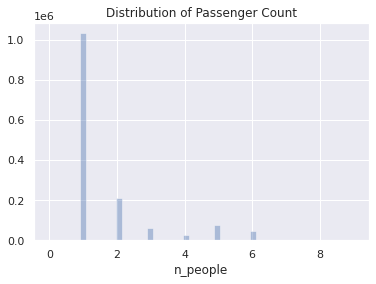

In [ ]:
#Observe the distribution of various variables in the Dataset
sns.distplot(df_tr['n_people'],kde=False)
plt.title('Distribution of Passenger Count')
plt.show()

In passenger count 7 and more passengers are being treated as outliers.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


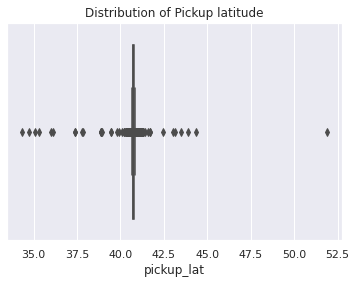

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


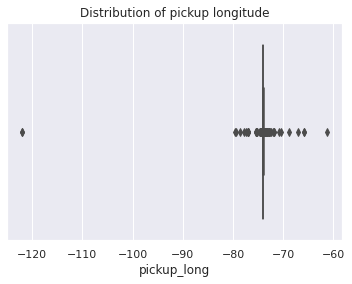

In [ ]:
#pickup latitude and longitude distribution
#sns.distplot(df_tr['pickup_lat'],kde=False)
sns.boxplot(df_tr.pickup_lat)
plt.title('Distribution of Pickup latitude')
plt.show()

#sns.distplot(df_tr['pickup_long'],kde=False)
sns.boxplot(df_tr.pickup_long)
plt.title('Distribution of pickup longitude')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


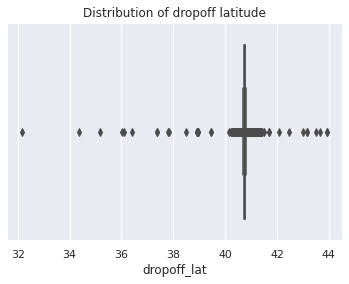

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


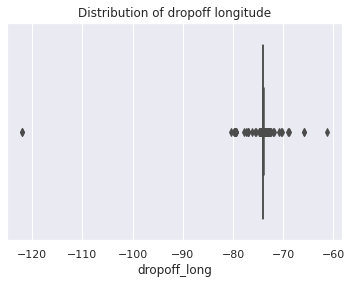

In [ ]:
#dropoff latitude and longitude distribution
#sns.distplot(df_tr['dropoff_lat'],kde=False)
sns.boxplot(df_tr.dropoff_lat)
plt.title('Distribution of dropoff latitude')
plt.show()

#sns.distplot(df_tr['dropoff_long'],kde=False)
sns.boxplot(df_tr.dropoff_long)
plt.title('Distribution of dropoff longitude')
plt.show()

We can observe that there are some outliers in pickup_long, pickup_lat, dropoff_long and dropoff_lat respectively.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


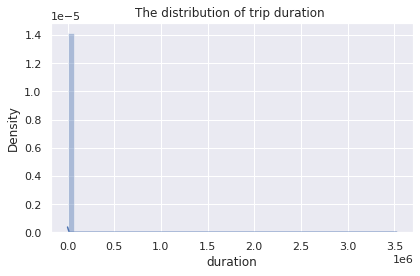

In [ ]:
#lets plot the trip_duration distribution 

sns.distplot(df_tr['duration'], hist=True,kde= True)
plt.title('The distribution of trip duration ')
plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


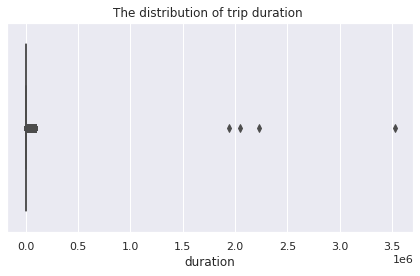

In [ ]:
sns.boxplot(df_tr.duration)
plt.title('The distribution of trip duration ')
plt.tight_layout()

The target variable duration has also some outliers in it.

In [ ]:
# Looking at trip duration less than 15s
df_tr[df_tr.duration<15]

,vendor,n_people,pickup_long,pickup_lat,dropoff_long,dropoff_lat,duration,day,month,hour,date,day_name,distance
842,2,2,-73.782372,40.648766,-73.782372,40.648746,3,21,5,12,2016-05-21,Saturday,0.002121
1107,2,3,-73.827660,40.716175,-73.822113,40.711452,2,23,6,13,2016-06-23,Thursday,0.703066
1492,1,1,-73.793442,40.644814,-73.795242,40.644669,7,13,1,20,2016-01-13,Wednesday,0.152765
1960,1,1,-73.964096,40.777172,-73.964088,40.777157,3,30,3,8,2016-03-30,Wednesday,0.001814
2441,2,1,-73.781830,40.644699,-73.781830,40.644699,8,23,5,14,2016-05-23,Monday,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456442,2,1,-73.978844,40.761787,-73.978951,40.761833,7,11,2,8,2016-02-11,Thursday,0.010336
1456613,1,1,-73.789665,40.646984,-73.789658,40.646976,9,6,6,18,2016-06-06,Monday,0.001065
1457121,1,1,-73.913620,40.765675,-73.913620,40.765667,7,3,4,7,2016-04-03,Sunday,0.000848
1457746,2,1,-73.975708,40.733089,-73.975685,40.733101,12,29,1,21,2016-01-29,Friday,0.002311


In [ ]:
# Removing trip duration less than 15s
df_tr[df_tr.duration>15]

,vendor,n_people,pickup_long,pickup_lat,dropoff_long,dropoff_lat,duration,day,month,hour,date,day_name,distance
0,2,1,-73.982155,40.767937,-73.964630,40.765602,455,14,3,17,2016-03-14,Monday,1.498523
1,1,1,-73.980415,40.738564,-73.999481,40.731152,663,12,6,0,2016-06-12,Sunday,1.805510
2,2,1,-73.979027,40.763939,-74.005333,40.710087,2124,19,1,11,2016-01-19,Tuesday,6.385108
3,2,1,-74.010040,40.719971,-74.012268,40.706718,429,6,4,19,2016-04-06,Wednesday,1.485501
4,2,1,-73.973053,40.793209,-73.972923,40.782520,435,26,3,13,2016-03-26,Saturday,1.188590
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,2,4,-73.982201,40.745522,-73.994911,40.740170,778,8,4,13,2016-04-08,Friday,1.225082
1458640,1,1,-74.000946,40.747379,-73.970184,40.796547,655,10,1,7,2016-01-10,Sunday,6.049844
1458641,2,1,-73.959129,40.768799,-74.004433,40.707371,764,22,4,6,2016-04-22,Friday,7.824617
1458642,1,1,-73.982079,40.749062,-73.974632,40.757107,373,5,1,15,2016-01-05,Tuesday,1.092565


In [ ]:
# Looking at standard deviation of trip duration 
df_tr.duration.std()

5237.431724497621

In [ ]:
def std_dev_outlier_removal_2std(df_tr,column_string):
  m=df_tr[column_string].mean()
  sd=df_tr[column_string].std()
  df=df_tr[(df_tr[column_string]<(m + 2*sd))&(df_tr[column_string]>(m - 2*sd))]
  return df_tr

In [ ]:
#removing the outliers from duration column
df_tr=std_dev_outlier_removal_2std(df_tr,'duration')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


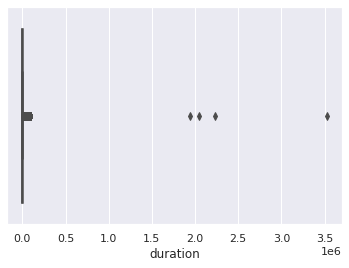

In [ ]:
#let us plot the boxplot of trip duration 
sns.boxplot(df_tr.duration)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2681: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  color=hist_color, **hist_kws)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:177: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  kws["color"] = to_rgba(color, alpha)


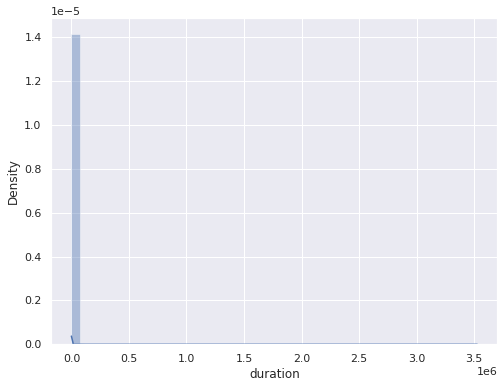

In [ ]:
# Plotting the distribution of trip duration
plt.figure(figsize=(8,6))
sns.distplot(df_tr['duration'],color="B")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


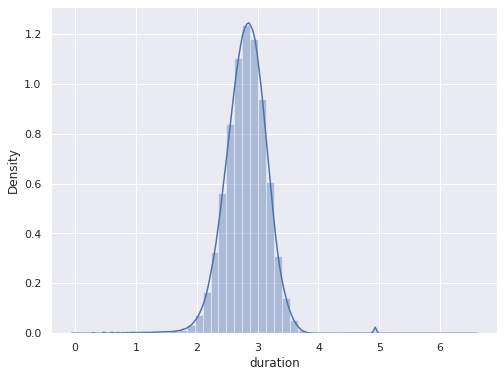

In [ ]:
#Lets plot the distribution plot for trip duration applying log of trip_duration
plt.figure(figsize = (8,6))
sns.distplot(np.log10(df_tr['duration']),color="B")
plt.show()

### Number of People/Passengers

Taxi limit for people is that a maximum of 4 passengers can take ride in traditional cabs. There are also some cabs in which maximum of 5 passengers can travel. A child under 7 years is allowed to sit on a passenger's lap in the rear seat in addition to the passengers limit. Therefore, in total the maximum of 6 passengers can travel in the new york city taxi (i.e. 5 adults + 1 minor child)


In [ ]:
# Number of trips for each passenger 
df_tr.n_people.value_counts()

1    1033540
2     210318
5      78088
3      59896
6      48333
4      28404
0         60
7          3
9          1
8          1
Name: n_people, dtype: int64

We can observe that there are 60 trips with 0 passengers and 5 trips with more than 6 passengers.As the both cases are not possible as per the taxi limit in New York City. So, in total there are 65 outliers which we must remove.

In [ ]:
# Keeping passenger counts greater than zero
df_tr=df_tr[df_tr.n_people>0]

In [ ]:
# Also,keeping passenger counts less than 7
df_tr=df_tr[df_tr.n_people<7]

In [ ]:
# Checking the passengers again after removing outliers
df_tr.n_people.value_counts()

1    1033540
2     210318
5      78088
3      59896
6      48333
4      28404
Name: n_people, dtype: int64

Now it's perfect!

###Bivariant Analysis

1) duration v/s n_people

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


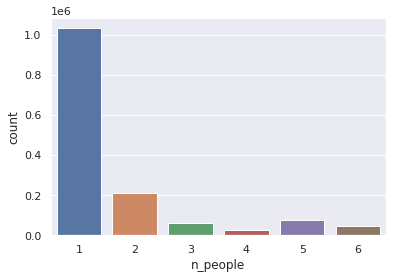

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


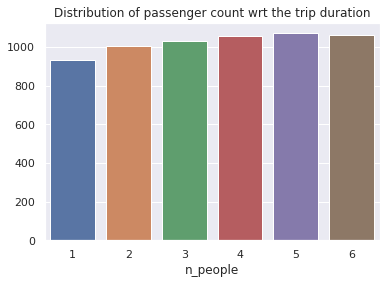

In [ ]:
# Plotting passenger counts vs trip duration by taking mean of trip duration over each passenger count
sns.countplot(df_tr.n_people)
plt.show()
df = df_tr.groupby('n_people')['duration'].mean()
plt.title('Distribution of passenger count wrt the trip duration')
sns.barplot(df.index,df.values)
plt.show()

#sns.catplot(y='trip_duration',x='passenger_count',data=df,kind='strip')

2) duration v/d Vendor 

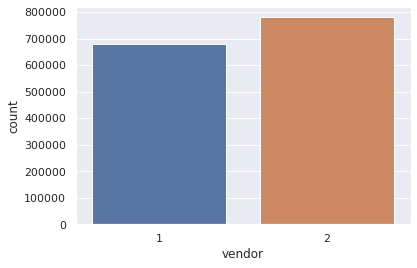

vendor
1     845.457783
2    1058.572829
Name: duration, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


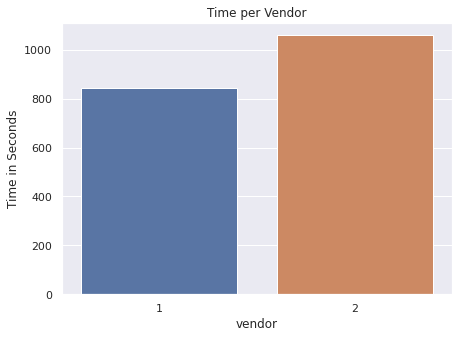

In [ ]:
# Plot counts for each vendor id vs trip duration by taking mean of trip duration over each vendor id
sns.countplot(x='vendor',data=df_tr)
plt.show()
df = df_tr.groupby('vendor')['duration'].mean()
print(df)
plt.subplots(1,1,figsize=(7,5))
sns.barplot(df.index,df.values)
plt.title('Time per Vendor')
plt.ylabel('Time in Seconds')
plt.show()

3) pickup_lat v/s pickup_long

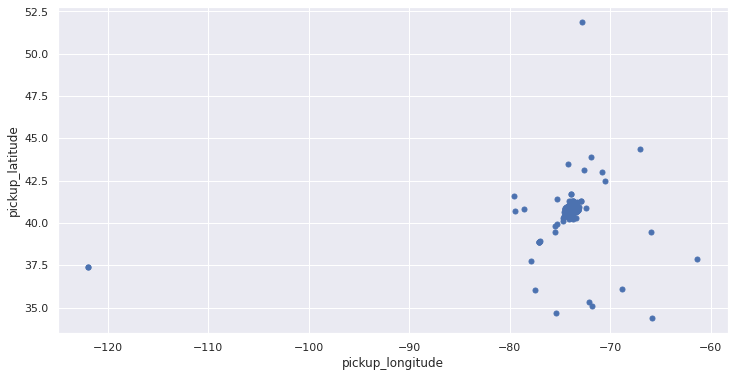

In [ ]:
#let us plot the pickup positions to visualize outliers
pickup_longitude = list(df_tr.pickup_long)
pickup_latitude = list(df_tr.pickup_lat)
plt.subplots(figsize=(12,6))
plt.plot(pickup_longitude, pickup_latitude, '.', alpha = 1, markersize = 10)
plt.xlabel('pickup_longitude')
plt.ylabel('pickup_latitude')
plt.show()

4) dropoff latitude v/s dropoff longitude

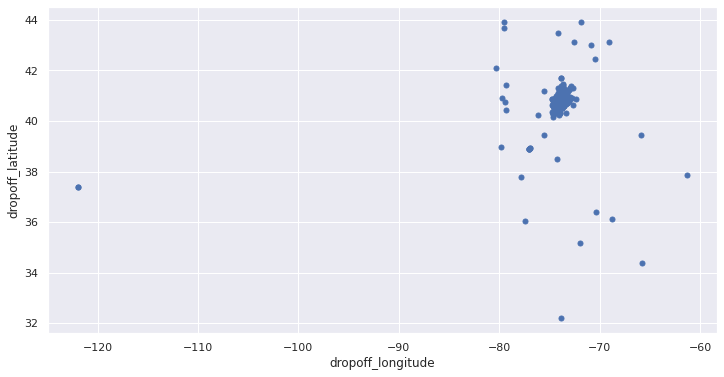

In [ ]:
#let us plot the dropoff positions to visualize outliers
dropoff_longitude = list(df_tr.dropoff_long)
dropoff_latitude = list(df_tr.dropoff_lat)
plt.subplots(figsize=(12,6))
plt.plot(dropoff_longitude, dropoff_latitude, '.', alpha = 1, markersize = 10)
plt.xlabel('dropoff_longitude')
plt.ylabel('dropoff_latitude')
plt.show()

We can observe that there are some outliers at pickup_lat,pickup_long, dropoff_lat and dropoff_long.

In [ ]:
#check the outliers in pickup_long
df_tr[df_tr.pickup_long<-120]

,vendor,n_people,pickup_long,pickup_lat,dropoff_long,dropoff_lat,duration,day,month,hour,date,day_name,distance
1068810,2,2,-121.933235,37.389297,-121.933205,37.389103,1105,27,1,18,2016-01-27,Wednesday,0.021800
1184454,2,2,-121.933342,37.389381,-121.933304,37.389511,499,26,2,13,2016-02-26,Friday,0.014811


In [ ]:
#Let us remove the outliers one by one
df_tr = df_tr[(df_tr.pickup_long > -120)]
df_tr = df_tr[(df_tr.pickup_lat < 50)]
df_tr = df_tr[(df_tr.dropoff_long < -70) & (df_tr.dropoff_long > -80)]
df_tr = df_tr[(df_tr.dropoff_lat < 50)]

In [ ]:
df_tr.shape

(1458570, 13)

5) duration per month

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


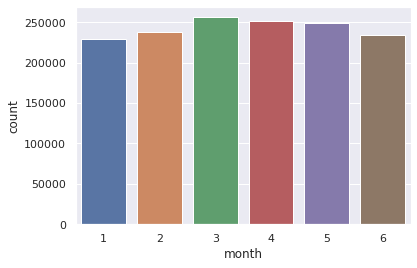

month
1     922.397539
2     920.867860
3     937.392702
4     962.919562
5     999.500612
6    1013.023716
Name: duration, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


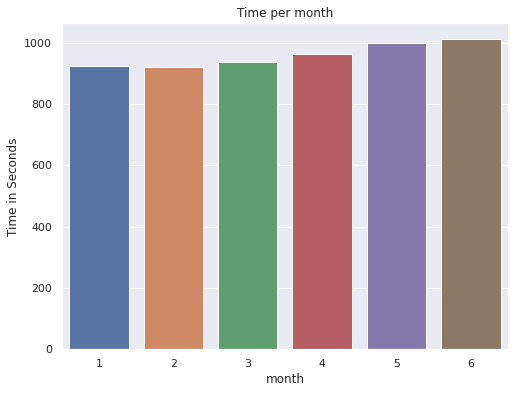

In [ ]:
# Plotting the no. of trips in each month
sns.countplot(df_tr.month)
plt.show()
df = df_tr.groupby('month')['duration'].mean()
print(df)
plt.subplots(1,1,figsize=(8,6))
sns.barplot(df.index,df.values)
plt.title('Time per month')
plt.ylabel('Time in Seconds')
plt.show()

6) duration per day

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


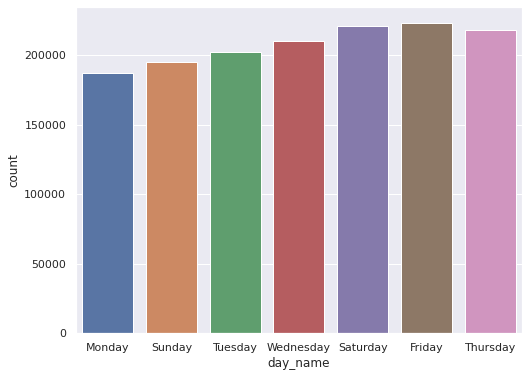

day_name
Thursday     1006.566728
Friday        990.259551
Tuesday       983.482266
Wednesday     975.453370
Saturday      948.095561
Sunday        901.705100
Monday        897.505451
Name: duration, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


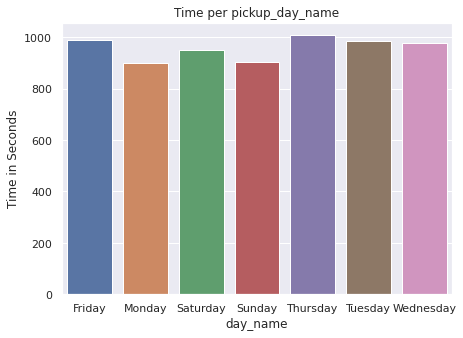

In [ ]:
# Plotting the observation each day of week
plt.figure(figsize=(8,6))
sns.countplot(df_tr.day_name)
plt.show()
df = df_tr.groupby('day_name')['duration'].mean()
print(df.sort_values(ascending=False))
plt.subplots(1,1,figsize=(7,5))
sns.barplot(df.index,df.values)
plt.title('Time per pickup_day_name')
plt.ylabel('Time in Seconds')
plt.show()

In [ ]:
# Creating function for ordering each day of week. The weigths are assigned according to the traffic. Days with more trips are assigned higher weights.
def day(s):
    if setattr=='Monday':
        return 3
    elif s=='Tuesday':
        return 4
    elif s=='Wednesday':
        return 6
    elif s=='Thursday':
        return 7
    elif s=='Friday':
        return 5
    elif s=='Saturday':
        return 2
    else:
        return 1

In [ ]:
# Let us creat the feature to order each day of week
df_tr['pickup_dayn']=df_tr['day_name'].apply(day)

7) duration per hour

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


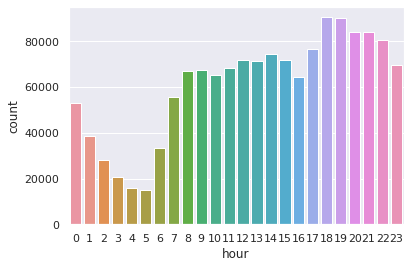

hour
15    1118.848030
16    1078.878367
14    1075.827401
13    1032.253820
17    1030.607301
22    1023.493682
12     993.512662
18     981.599419
11     966.421672
0      936.742088
9      933.542668
10     933.381579
23     925.127644
8      924.530059
4      922.092464
1      903.287641
19     894.407807
21     890.550492
3      890.110223
2      890.100000
20     879.491305
7      831.758345
5      822.568580
6      797.458267
Name: duration, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


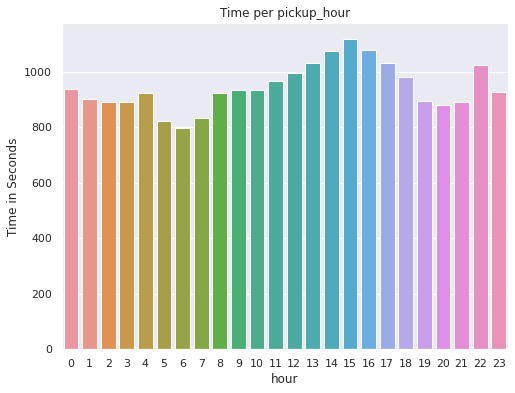

In [ ]:
# Observing the traffic at traffic at each hour of day
sns.countplot(df_tr.hour)
plt.show()
df = df_tr.groupby('hour')['duration'].mean()
print(df.sort_values(ascending=False))
plt.subplots(1,1,figsize=(8,6))
sns.barplot(df.index,df.values)
plt.title('Time per pickup_hour')
plt.ylabel('Time in Seconds')
plt.show()

We can observe that the at 6 to 7 pm there are maximum number of trips and at 4 to 5 am there are least number of trips. Also, we can observe that at 3pm the trip duratio is higher than rest of hours.

In [ ]:
# #Divide the timezone into 4 zones
def time_of_day(x):
    if x in range(4,10):
        return 'Morning'
    elif x in range(10,16):
        return 'Midday'
    elif x in range(16,22):
        return 'Evening'    
    else:
        return 'Night'

In [ ]:
# Creating feature of four time sessions according to traffic
df_tr['timeofday']=df_tr['hour'].apply(time_of_day)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


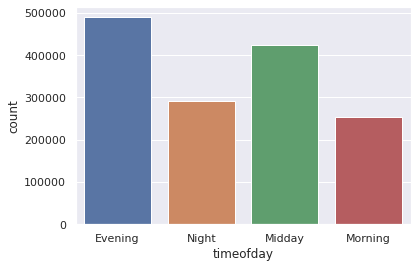

In [ ]:
#Let us plot the time of day
sns.countplot(df_tr.timeofday)

## **Feature Engineering**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


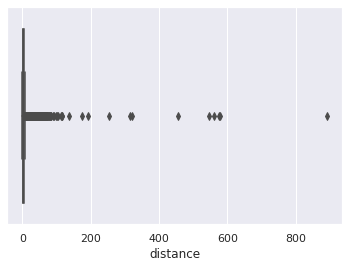

In [ ]:
#Let us plot the boxplot of the distance feature
sns.boxplot(df_tr.distance)

In [ ]:
# let us view the trips covered in less than 50m
df_tr[df_tr.distance<0.05]

,vendor,n_people,pickup_long,pickup_lat,dropoff_long,dropoff_lat,duration,day,month,hour,date,day_name,distance,pickup_dayn,timeofday
246,2,1,-73.981819,40.768963,-73.981819,40.768963,227,29,2,18,2016-02-29,Monday,0.000000,1,Evening
291,2,2,-73.959068,40.775661,-73.959068,40.775661,1109,10,5,18,2016-05-10,Tuesday,0.000000,4,Evening
323,1,1,-74.001030,40.756653,-74.000999,40.756626,40,27,6,11,2016-06-27,Monday,0.003927,1,Midday
337,1,1,-73.986305,40.777023,-73.985855,40.776791,1778,20,5,14,2016-05-20,Friday,0.045893,5,Midday
407,2,6,-73.808487,40.687336,-73.808487,40.687336,947,16,5,23,2016-05-16,Monday,0.000000,1,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1457746,2,1,-73.975708,40.733089,-73.975685,40.733101,12,29,1,21,2016-01-29,Friday,0.002311,5,Evening
1458044,2,1,-74.007378,40.739441,-74.007378,40.739449,7,12,3,1,2016-03-12,Saturday,0.000848,2,Night
1458291,2,1,-73.936874,40.764610,-73.936768,40.764694,318,4,5,1,2016-05-04,Wednesday,0.012962,6,Night
1458544,1,1,-73.956459,40.767231,-73.956589,40.767269,38,16,6,15,2016-06-16,Thursday,0.011717,7,Midday


In [ ]:
df_tr.shape


(1458570, 13)

In [ ]:
# Removing trips with distance less than 50m
df_tr=df_tr[df_tr.distance>0.05]

In [ ]:
df_tr.shape

(1447294, 13)

In [ ]:
# Looking for trips covered greater than 180 km
df_tr[df_tr.distance>180]

,vendor,n_people,pickup_long,pickup_lat,dropoff_long,dropoff_lat,duration,day,month,hour,date,day_name,distance
275644,1,4,-75.354332,34.712234,-73.834923,32.181141,875,24,2,16,2016-02-24,Wednesday,314.764648
377068,1,1,-74.007095,40.717113,-76.963242,38.946033,282,2,4,20,2016-04-02,Saturday,320.126227
397526,1,2,-73.870682,40.773598,-79.817978,38.963852,2515,28,4,13,2016-04-28,Thursday,545.854270
644165,2,1,-73.980751,40.757111,-74.240051,38.478298,804,2,6,15,2016-06-02,Thursday,254.363882
910072,1,2,-73.989914,40.756634,-70.346077,36.398121,303,15,2,18,2016-02-15,Monday,578.843635
923793,1,1,-73.972366,40.758633,-79.553535,43.674000,1405,24,2,21,2016-02-24,Wednesday,562.235982
974378,2,5,-71.799896,35.081532,-79.352837,40.436329,611,6,1,20,2016-01-06,Wednesday,891.215362
1013474,1,1,-73.978912,40.756763,-79.338699,41.427902,933,5,5,18,2016-05-05,Thursday,455.241847
1100676,1,2,-73.991325,40.750023,-79.518616,43.921028,3267,3,5,16,2016-05-03,Tuesday,574.876255
1301396,1,1,-73.981491,40.773251,-76.135719,40.243626,9922,26,3,22,2016-03-26,Saturday,191.403063


In [ ]:
# Removing trips with distance greater than 180 km
df_tr=df_tr[df_tr.distance<180]

In [ ]:
df_tr.shape

(1447284, 13)

We can observe that there are some trips with 0km distance.

The reasons for 0 km distance can be:

1.   The dropoff location couldn’t be tracked.
2.   The driver deliberately took this ride to complete a target ride number.
3.  The passengers canceled the trip.

so, we removed the outliers of distance feature.


###duration v/s distance

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


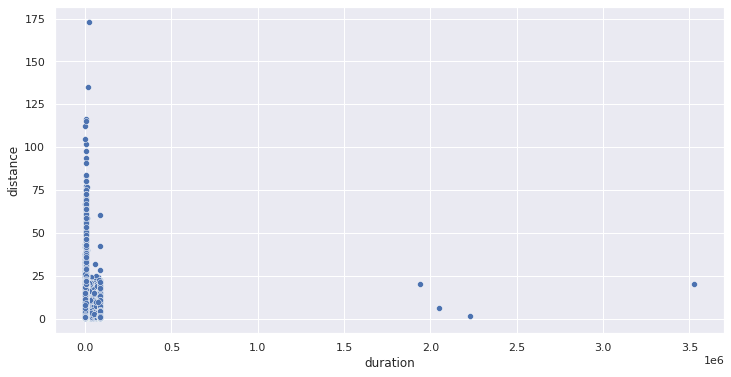

In [ ]:
#let us plot the Scatter Plot of distance vs trip duration
plt.figure(figsize=(12,6))
sns.scatterplot(df_tr.duration,df_tr.distance)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


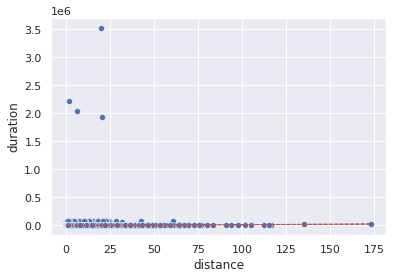

In [ ]:
#lets plot the scatter plot of the trip duration and the distance
#plt.figure(figsize=(7,7))
sns.scatterplot(df_tr['distance'],df_tr['duration'])

z = np.polyfit(df_tr['distance'], df_tr['duration'],1)
y_hat = np.poly1d(z)(df_tr['distance'])
plt.plot(df_tr['distance'], y_hat, "r--",lw=1)

Scatter plots of trip duration versus the trip distance shows a certain amount of correlation, as expected, but the scatter is still relatively high. Some less-logical clusters also appear, such as a lot of zero-time trips which may indicate corrupted data entries.

## Correlation Analysis

In [ ]:
!pip install klib


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 133 kB 7.1 MB/s 
  Attempting uninstall: Jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.1.2 which is incompatible.


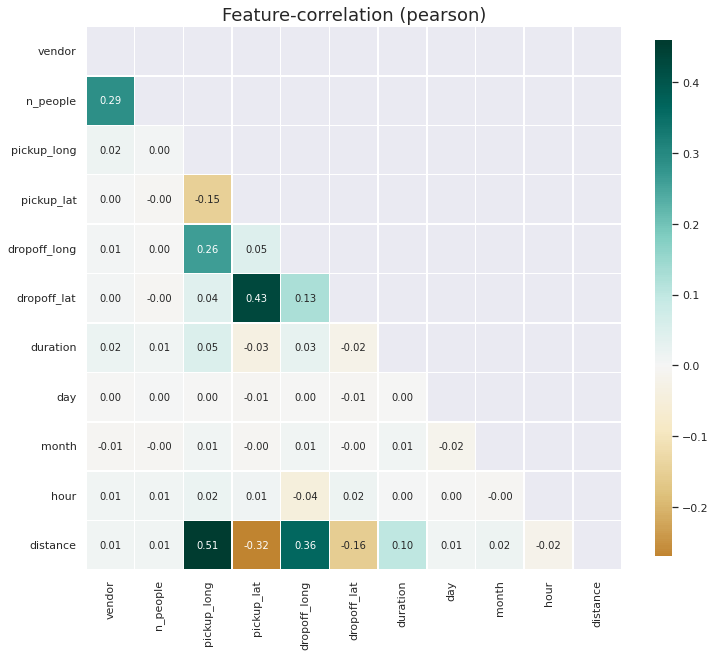

In [ ]:
# Corelation plot
import klib
klib.corr_plot(df_tr)

In [ ]:
# Spearman correlation for the correlation values w.r.t trip duration
df_tr.corr(method='spearman')['duration']

vendor          0.006657
n_people        0.024714
pickup_long     0.028609
pickup_lat     -0.110066
dropoff_long    0.069958
dropoff_lat    -0.125411
duration        1.000000
day             0.011303
month           0.050454
hour            0.030443
distance        0.796716
Name: duration, dtype: float64

In [ ]:
klib.corr_plot(df_tr, target='wine')

KeyError: ignored

In [ ]:
# Observing correlation values that are greater than 0.5 to check multicollinearity
df_tr.drop('duration',axis=1).corr(method='spearman')[df_tr.drop('duration',axis=1).corr(method='spearman')>0.5]

,vendor,n_people,pickup_long,pickup_lat,dropoff_long,dropoff_lat,day,month,hour,distance,pickup_dayn
vendor,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
n_people,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pickup_long,NaN,NaN,1.000000,0.597365,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pickup_lat,NaN,NaN,0.597365,1.000000,NaN,0.502150,NaN,NaN,NaN,NaN,NaN
dropoff_long,NaN,NaN,NaN,NaN,1.000000,0.545044,NaN,NaN,NaN,NaN,NaN
dropoff_lat,NaN,NaN,NaN,0.502150,0.545044,1.000000,NaN,NaN,NaN,NaN,NaN
day,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
hour,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
distance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN


In [ ]:
def boundingbox(df, BB):
    return ((df_tr["pickup_long"] >= BB[0]) & (df_tr["pickup_long"] <= BB[1]) & 
            (df_tr["pickup_lat"] >= BB[2]) & (df_tr["pickup_lat"] <= BB[3]) &
            (df_tr["dropoff_long"] >= BB[0]) & (df_tr["dropoff_long"] <= BB[1]) &
            (df_tr["dropoff_lat"] >= BB[2]) & (df_tr["dropoff_lat"] <= BB[3]))
BB = (-74.3, -73.0, 40.6, 41.7)

####Let us View the Map

In [ ]:
import folium
nyc = folium.Map(location=[40.730610,-73.935242],zoom_start=12,)
nyc

In [ ]:
#view the Pickup latitude and longitude
for i in df_tr.index[:100]:
  folium.CircleMarker(location=[df_tr['pickup_lat'][i],df_tr['pickup_long'][i]],color='green').add_to(nyc)
nyc

In [ ]:
#view the dropoff latitude and longitude
for i in df_tr.index[:100]:
  folium.CircleMarker(location=[df_tr['dropoff_lat'][i],df_tr['dropoff_long'][i]],color='red').add_to(nyc)
nyc

##**Model Building**

In [ ]:
df_tr.columns

Index(['vendor', 'n_people', 'pickup_long', 'pickup_lat', 'dropoff_long',
       'dropoff_lat', 'duration', 'day', 'month', 'hour', 'date', 'day_name',
       'distance', 'pickup_dayn', 'timeofday'],
      dtype='object')

In [ ]:
# Now, selecting the features to be used for regression
f =['n_people', 'pickup_long', 'pickup_lat', 'dropoff_long','dropoff_lat', 'month', 'hour','date', 'pickup_dayn', 'timeofday', 'distance']


In [ ]:
# Extracting the selected features and label from dataframe
feature_df=df_tr[f]
label=df_tr['duration']
# converting categorical columns into numeric categories
fcd=pd.get_dummies(feature_df,drop_first=True)

##Train and Test Splitting the data

In [ ]:
#importing libraries and performing train test split
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import cross_val_score,ShuffleSplit,cross_val_predict

x_train,x_test,y_train,y_test=train_test_split(fcd, label, test_size=0.2,random_state=0)

print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)
# standard scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

(1157827, 193) (1157827,)
(289457, 193) (289457,)


###Evaluation Metrics

In [ ]:
# definig a function for Evaluation metrics 
def metrics(actual,prediction,model=''):

  print(f"{model} MSE   :", mean_squared_error(actual,prediction))
  print(f"{model} MAE   :", mean_absolute_error(actual,prediction))
  print(f"{model} RMSE  :", np.sqrt(mean_squared_error(actual,prediction)))
  print(f"{model} R2    :", r2_score(actual,prediction))
  

###Baseline Model

By using the target variable mean as a predicted value we will measure the metrics. Then we compare the ML algorithms with this baseline metrics score. In order to meet the selection criteria, the model must have improved the metrics score than the baseline model.

In [ ]:
#building the baseline model
test=pd.DataFrame()
test['y_test']=pd.DataFrame(y_test.values)
test['ymean']=test.y_test.mean()

metrics((test['y_test']),(test['ymean']),'Base')

Base MSE   : 24879467.06585187
Base MAE   : 633.4751007326371
Base RMSE  : 4987.932143268578
Base R2    : 0.0


##**Linear Regression Model**

Linear Regression is a machine learning algorithm based on supervised learning.
It performs a regression task. Linear regression attempts to model the relationship between two variables by fitting a linear equation to observed data. One variable is supposed to be and input variable and the other is a target variable.


In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression().fit(x_train,y_train)
y_train_prdc_lr = cross_val_predict(lr,x_train,y_train,cv=4)
y_prdc_lr=lr.predict(x_test)

#Evaluation metrics of linear regression
metrics((y_train),(y_train_prdc_lr),'LR_train')
metrics((y_test),(y_prdc_lr),'LR_test')
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_prdc_lr)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))

LR_train MSE   : 27922790.48846239
LR_train MAE   : 433.33135696421715
LR_train RMSE  : 5284.201972716636
LR_train R2    : 0.010779115084619928
LR_test MSE   : 24581452.1323411
LR_test MAE   : 437.3386472127502
LR_test RMSE  : 4957.968548946343
LR_test R2    : 0.01197834876132886
Adjusted R2 :  0.011319127987538091


##**Ridge Regression Model**

Ridge regression is a model tuning method that is used to analyse any data that suffers from multicollinearity. This method performs L2 regularization. It is used in estimating the coefficients of multiple-regression models in scenarios where the independent variables are highly correlated. 

In [ ]:
from sklearn.linear_model import Ridge

rdg= Ridge(random_state=0, max_iter=[300],alpha=0.1).fit(x_train,y_train)
y_train_prdc_rdg = cross_val_predict(rdg,x_train,y_train,cv=4)
y_prdc_rdg=rdg.predict(x_test)

#Evaluation metrics of linear regression
metrics((y_train),(y_train_prdc_rdg),'RG_train')
metrics((y_test),(y_prdc_rdg),'RG_test')
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_prdc_rdg)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))

RG_train MSE   : 27922807.08641429
RG_train MAE   : 433.20282830677223
RG_train RMSE  : 5284.203543242282
RG_train R2    : 0.010778527068867172
RG_test MSE   : 24581526.105464134
RG_test MAE   : 437.32414999706367
RG_test RMSE  : 4957.976008964155
RG_test R2    : 0.011975375501377727
Adjusted R2 :  0.01131615274378961


##**Random Forest**

Random forests or random decision forests is an ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time. 

For classification tasks, the output of the random forest is the class selected by most trees. For regression tasks, the mean or average prediction of the individual trees is returned. 


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(criterion='squared_error',random_state=0,n_estimators=20,max_depth=2).fit(x_train,y_train)
y_train_prdc_rf = cross_val_predict(rf,x_train,y_train,cv=4)
y_prdc_rf=rf.predict(x_test)

#Evaluation metrics of random forest
metrics((y_train),(y_train_prdc_rf),'RF_train')
metrics((y_test),(y_prdc_rf),'RF_test')
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_prdc_rf)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))

RF_train MSE   : 27953172.296218105
RF_train MAE   : 447.8456641691758
RF_train RMSE  : 5287.075968455352
RF_train R2    : 0.009702778578572713
RF_test MSE   : 24582065.83257655
RF_test MAE   : 447.7770622505113
RF_test RMSE  : 4958.030438851354
RF_test R2    : 0.011953681824781404
Adjusted R2 :  0.01129444459289286


##**Gradient Boosting**

Gradient boosting is a machine learning technique used in regression and classification tasks, among others. It gives a prediction model in the form of an ensemble of weak prediction models, which are typically decision trees. When a decision tree is the weak learner, the resulting algorithm is called gradient-boosted trees; it usually outperforms random forest

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor(n_estimators=20, random_state=0, max_depth=2, learning_rate=0.1,validation_fraction=0.16).fit(x_train,y_train)
y_train_prdc_gb = cross_val_predict(gb,x_train,y_train,cv=4)
y_prdc_gb=gb.predict(x_test)


#Evaluation metrics of gradient boosting
metrics(y_train,y_train_prdc_gb,'GB_train')
metrics(y_test,y_prdc_gb,'GB_test')
print("Adjusted R2 : ", 1-(1-r2_score((y_test), (y_prdc_gb)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))

GB_train MSE   : 27972567.4273828
GB_train MAE   : 440.76636016134694
GB_train RMSE  : 5288.909852453793
GB_train R2    : 0.009015667137410754
GB_test MSE   : 24595407.15989133
GB_test MAE   : 444.4039270433657
GB_test RMSE  : 4959.375682471668
GB_test R2    : 0.011417443356350088
Adjusted R2 :  0.010757848339247311


In [ ]:
#feature_df

"""f_imp = list(zip(fcd,rf.feature_importances_))
f_imp.sort(key = lambda x : x[1])
plt.barh([x[0] for x in f_imp],[x[1] for x in f_imp])

plt.show()"""

'f_imp = list(zip(fcd,rf.feature_importances_))\nf_imp.sort(key = lambda x : x[1])\nplt.barh([x[0] for x in f_imp],[x[1] for x in f_imp])\n\nplt.show()'

In [ ]:
!pip install shap
import shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 5.9 MB/s 


In [ ]:
# Create object that can calculate shap values
explainer = shap.TreeExplainer(rf)
# Calculate Shap values
shap_values = explainer.shap_values(x_test)

In [ ]:
# defining feature names
imp_features=fcd.columns

SHAP Feature importance and SHAP Summary Plot

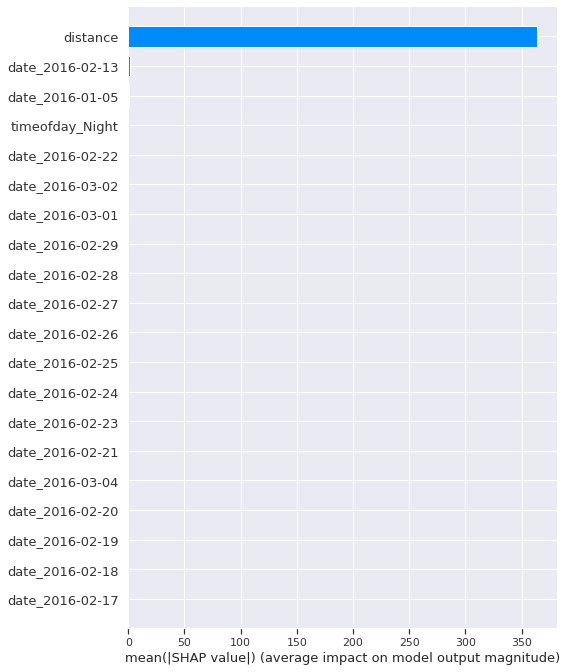

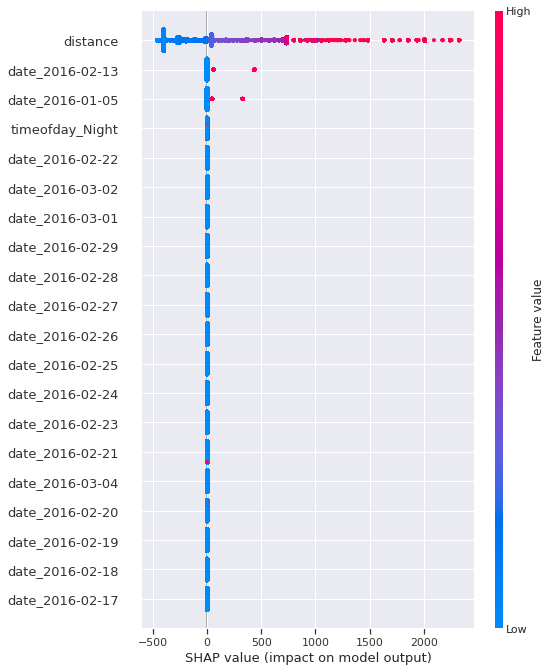

In [ ]:
shap.summary_plot(shap_values, x_test, feature_names=imp_features, plot_type="bar")
shap.summary_plot(shap_values, x_test, feature_names=imp_features)

###Evaluation of Models

In [ ]:
from prettytable import PrettyTable
train = PrettyTable(['SL NO',"METRICS", 'Linear Regression','Ridge Regressor', 'RandomForestRegressor','GradientBoost Regressor'])
train.add_row(['1','Train R2 ','0.0107','0.0107','0.0097','0.0090'])
train.add_row(['2','Train MSE','27922790.48','27922807.08','27953172.29','27972567.42'])
train.add_row(['3','Train RMSE ','5284.20','5284.20','5287.075','5288.909'])
train.add_row(['4','Test R2 ','0.01197','0.011975','0.0119','0.0114'])
train.add_row(['5','Test MSE','24581452.13','24581526.10','24582065.83','24595407.15'])
train.add_row(['6','Test RMSE','4957.96','4957.97','4958.03','4959.37'])
train.add_row(['7','Adjusted R2','0.0113','0.01131','0.01129','0.01075'])
print(train)

+-------+-------------+-------------------+-----------------+-----------------------+-------------------------+
| SL NO |   METRICS   | Linear Regression | Ridge Regressor | RandomForestRegressor | GradientBoost Regressor |
+-------+-------------+-------------------+-----------------+-----------------------+-------------------------+
|   1   |  Train R2   |       0.0107      |      0.0107     |         0.0097        |          0.0090         |
|   2   |  Train MSE  |    27922790.48    |   27922807.08   |      27953172.29      |       27972567.42       |
|   3   | Train RMSE  |      5284.20      |     5284.20     |        5287.075       |         5288.909        |
|   4   |   Test R2   |      0.01197      |     0.011975    |         0.0119        |          0.0114         |
|   5   |   Test MSE  |    24581452.13    |   24581526.10   |      24582065.83      |       24595407.15       |
|   6   |  Test RMSE  |      4957.96      |     4957.97     |        4958.03        |         4959.37   

###Selection of models


After observing all the metrics we select Random Forest Regressor model as we got improved metrics score when compared to Gradient Boosting Regressor:

r2 score: 0.0119

MAE: 447.77

RMSE: 4958.03

Adjusted r2 score: 0.01129  

on test data amongst all models.

**Now, we will perform Hyperparameter tuning for this model and see does accuracy improves or not**

### Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV,ShuffleSplit

cv = ShuffleSplit(n_splits=4, test_size=0.2,train_size=0.64, random_state=0)


param_grid = {
    'n_estimators' : np.arange(200,500,100),
    'max_depth': [8,12,25],
    'criterion':'squared_error',
}

RF_tuned=RandomizedSearchCV(rf, param_grid, cv=cv, n_iter = 20)

RF_tuned.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
80 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
12 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "/usr/local/lib/python3.7/dist-packages/joblib/parallel.py", line 1085, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.7/dist-packages/joblib/para

KeyError: ignored

In [ ]:
y_train_prdc_rf=RF_tuned.predict(x_train)
y_prdc_rf=RF_tuned.predict(x_test)
metrics(y_train,y_train_prdc_rf,'RF_train')
metrics(y_test,y_prdc_rf,'RF_test')
print("Adjusted R2 : ", 1-(1-r2_score((y_test), (y_prdc_rf)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:993: RuntimeWarning: invalid value encountered in true_divide
  y_hat /= len(self.estimators_)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:993: RuntimeWarning: invalid value encountered in true_divide
  y_hat /= len(self.estimators_)


ValueError: ignored